### Load the Multinews dataset
#### Find the top 10 documents with highest toxicity classification

In [8]:
%load_ext autoreload
%autoreload 2 

from data.dataset_loader import DataSetLoader

loader = DataSetLoader()
dataset = loader.load(debug_mode=True, batch_size=128,num_entries= 20000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loading reddit_tldr dataset...


Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

Debug mode: Using subset of data
Processing dataset...


Processing reddit_tldr dataset:   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

In [15]:
from datasets import load_from_disk

file ='data/reddit_tldr_20250603185109_debug_True.parquet'
dataset = load_from_disk(file)
df_dataset = dataset.to_pandas()


display(df_dataset.document_toxicity_detoxify.max())
display(df_dataset.document_toxicity_detoxify.min())
display(df_dataset.document_toxicity_detoxify.mean())


0.998914361000061

0.0004976990167051554

0.10141013004896231

### For the documents, find the top 1000 documents with higest toxicity using Detoxify model

In [17]:
df_dataset.sort_values(by='document_toxicity_detoxify', ascending=False, inplace=True)
top_1000 = df_dataset.head(1000)
display(df_dataset.head(10))

,document,document_length,summary_baseline,summary_length_baseline,document_toxicity_detoxify,summary_toxicity_detoxify,document_severe_toxicity_detoxify,summary_severe_toxicity_detoxify,document_obscene_detoxify,summary_obscene_detoxify,document_threat_detoxify,summary_threat_detoxify,document_insult_detoxify,summary_insult_detoxify,document_identity_attack_detoxify,summary_identity_attack_detoxify
6231,FUCK FAT PEOPLE! No kidding actually hate thos...,303,FAT PEOPLE ARE FAT FOR A FUCKING REASON.,40,0.998914,0.998090,0.601286,0.459904,0.993602,0.982007,0.014197,0.013957,0.974800,0.960813,0.478116,0.763230
13476,"Fuck those guys, the scrubs can't even league,...",153,I just like the Name :3,23,0.998771,0.000570,0.480233,0.000129,0.992888,0.000189,0.017239,0.000126,0.960206,0.000172,0.080521,0.000142
17876,Depends on how many stupid fucking kids decide...,962,I'm fucking bitter.,19,0.998614,0.985439,0.625166,0.113025,0.989492,0.971726,0.290844,0.003663,0.965607,0.151937,0.628746,0.003118
478,"Guys fuck with their dicks, and girls fuck wit...",530,"Sack up, go after what you want.",32,0.998598,0.531043,0.477477,0.000755,0.992860,0.012358,0.019555,0.002946,0.939363,0.008888,0.031732,0.001959
18372,God knows idiots like yourself upvoted you. Li...,240,you are a fucking idiot. \n EDIT: and the comm...,152,0.998366,0.997681,0.356623,0.314990,0.984959,0.986417,0.014774,0.003148,0.968678,0.962729,0.059132,0.020563
16120,Christian Bale: KICK YOUR FUCKING ASS! \n Sha...,3815,Christian Bale's meltdown on the set of Termin...,73,0.998274,0.942574,0.613575,0.027589,0.989803,0.910077,0.406148,0.001566,0.943148,0.104341,0.149719,0.002272
15592,Even you fuckers demand,23,s? Fuck you,11,0.998202,0.997340,0.361321,0.367429,0.988942,0.990502,0.003681,0.002715,0.953958,0.936867,0.026092,0.011477
712,"Oh, fuck that shit. \n No child should be rais...",921,"Welfare isn't supposed to be fun, tough shit.",45,0.998190,0.920504,0.356586,0.014466,0.986380,0.819346,0.050440,0.001147,0.907272,0.083956,0.025614,0.002067
8088,But its depressing to you... Ive spent like 3k...,376,does babe ruth make you sad?,28,0.998181,0.010191,0.336076,0.000089,0.987843,0.000361,0.026302,0.000137,0.895465,0.000461,0.021103,0.000245
15818,What the hell. What the fucking hell! \n Oh th...,580,"NO! FUCK YOU! READ THE GODDAMNED POST, ASSHOLE.",47,0.997982,0.997868,0.497474,0.394793,0.986625,0.991302,0.227684,0.003268,0.938594,0.952373,0.062444,0.018346


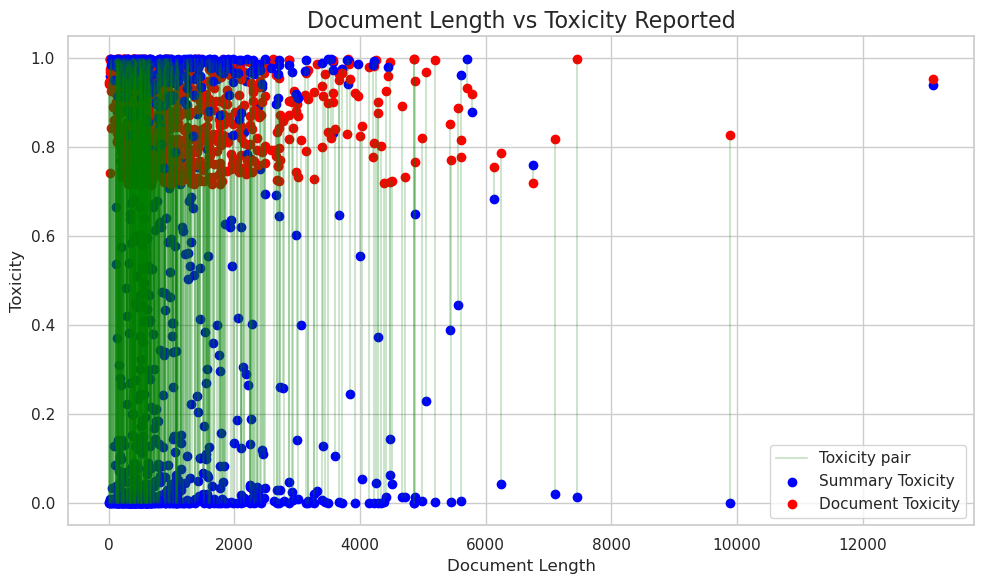

In [20]:
from visualization.toxicity_plot import plot_toxicity_comparison_with_length

plot_toxicity_comparison_with_length(top_1000['summary_toxicity_detoxify'], top_1000['document_toxicity_detoxify'], top_1000['document_length'])

In [31]:
print(top_10['document'][21])
print(top_10['summary'][21])
print(top_10['summary_toxicity_detoxify'])

If you were "really drunk," then the assumption has to be that your judgement is probably impaired, and its safer to not trust being able to consent.  But there's absolutely no reason why you should have a consent discussion while drunk.  You could easily talk about this stuff when both you and your girlfriend are fully mindful, and lay out ground rules for situations where you wouldn't be able to give meaningful consent in the moment. 
 There are a couple reasons why people take a hard line with regards to consent (any alcohol means unable to consent): 
 For one, our culture has a really messed up view of even obvious consent issues, as should be apparent by all the shit in this thread.  You need to take a hard line to make people realize the obvious, and too often people get bogged down in the idea that if you can't draw a line somewhere, you can't draw a line anywhere. 
 Second, it is really super easy to avoid any sort of consent issues.  Discuss things openly with your partner/par

## Summarisation using BART and T5

from summarizers.factory import SummarizerFactory

summarizer_factory = SummarizerFactory()
summarizers = ['bart','t5']

for summarizer in summarizers:
    summary = summarizer_factory.summarize(summarizer, top_10['document'].values)

    for 

    results.append({
        "model": summarizer.upper(),
        "input_text": top_10['document'].values,
        "summary": summary
    })

# Save to CSV
df = pd.DataFrame(results)
df.to_csv("model_summaries_bart_t5.csv", index=False)
    



